<a href="https://colab.research.google.com/github/MattEntornos/matematicas/blob/main/grafos/practica_grafos_matthew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?
3. Explique el algoritmo.
4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

### Solución 2.1
* Pregunta 2
 - La utilidad que tiene el algoritmo despues de la visualización de los dos vídeos es determinar el camino más corto para aplicar desde un punto de origen o podríamos decir también desde un vértice o nodo hata el resto de puntos o vértices situados en un grafo con pesos o distancias en cada arista.

* Pregunta 3

 - Tras la visualización de los dos vídeos lo podemos aplicar tanto para grafos no dirigidos como para grafos dirigidos:
 
      - Grafos (no dirigidos)
          
          . El algoritmo consiste en coger un punto de partida, vértice o nodo y averiguar la distancia más corta hasta el nodo o vértice i.

          . Cada nodo va a tener una etiqueta, la cual estará formada por 3 valores [ x , i ]k.
          
           - .Donde (x) será la distancia hasta el nodo j desde el nodo origen.

           - .Donde (i) será el nodo de procedencia.

           - .Donde (k) será el número de iteración que se hizo.
           
           - El nodo origen siempre va a tener la misma etiqueta [0 , - ]0 

        .Una vez cogida nuestra etiqueta permanente, la anulamos y comenzamos a calcular las etiquetas de sus nodos vecinos.

        .Para saber que nodo temporal coger, será el que menor distancia acumulada tenga y la comenzamos a utilizar como nodo origen o nodo referencia para seguir calculando distancias.

        .Es posible que en algun momento llegue a tener dos etiquetas para un mismo nodo, eliminaré con el que menor distancia tenga. Un ejemplo para el nodo 3 tengo las siguiente etiquetas --> [5,4]2 y [4,2]3. Me quedaré con la segunda etiqueta [4,2]3 ya que es la distancia más corta. En el caso de que las distancias lleguen a ser idénticas, me quedaré con las dos ya que ese nodo tendrá dos rutas óptimas.
        
       - Grafos (dirigidos)  

         .Exactamente igual que en los grafos (no dirigidos) salvo que no se escribe el número de iteración que se hizo (k).








* Pregunta 4.1

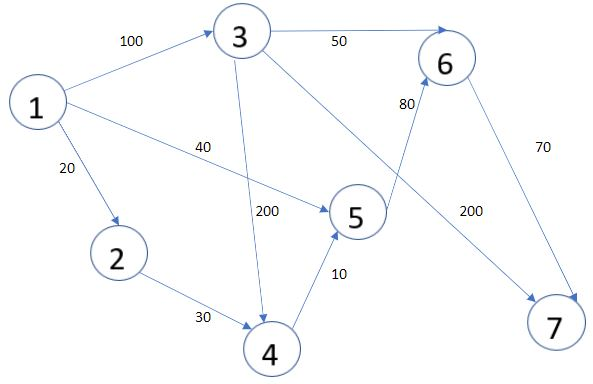


* Pregunta 4.2




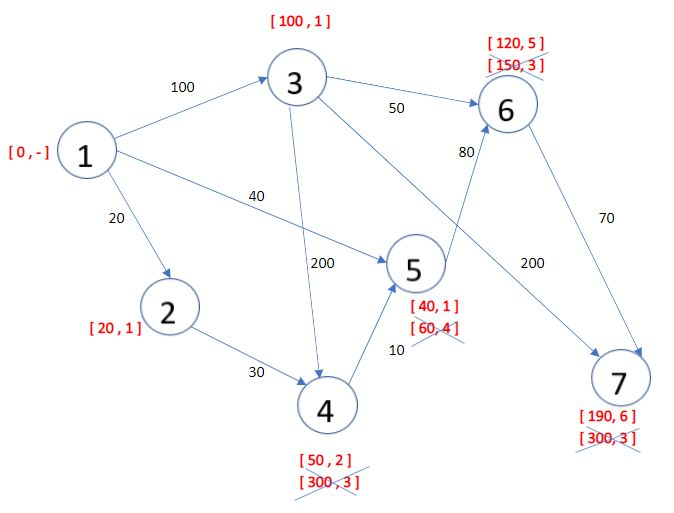

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

### Solución 2.2
  * El ejercicio está resuelto en el archivo excel subida al Aula Virtual con la siguiente estructura:

    - HOJA 1: Caso del vídeo de ejemplo que se proporciona en el enunciado.

    - HOJA 2: Grafo de invención propia resuelto por el método Solver con una imagen del grafo. (EL grafo original se encuentra en la Hoja 3).

    - HOJA 3: Estructura del grafo propio para comprobar que se ha hecho en la misma hoja de excel.

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

### Solución 2.3
* Pregunta 1
  
  - Tras la visualización de varias páginas, el que he considerado más claro de entender y más óptimo es el siguiente:

      . https://www.techiedelight.com/es/single-source-shortest-paths-dijkstras-algorithm/

      En el cual, el algoritmo se da además en dos lenguajes más: Java  y C##.

* Pregunta 2

  - Utilicemos el grafo que pusimos de ejemplo en el ejericio 1 (volvemos a adjuntar la imagen).

  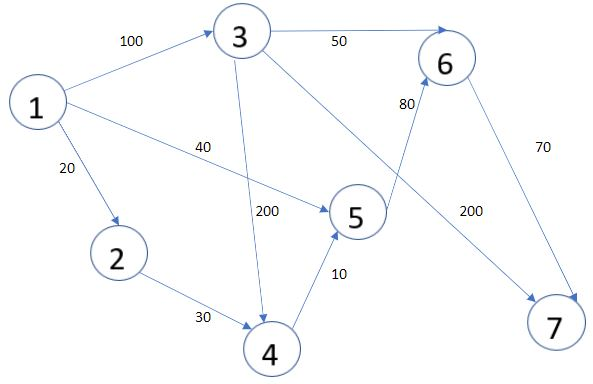


In [ ]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función __lt__() para hacer que la clase `Node` funcione con un min-heap
    def __lt__(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def __init__(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}')
            route.clear()
 
 
if __name__ == '__main__':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(1, 3, 100), (1, 2, 20), (3, 6, 50), (2, 4, 30), (3, 4, 200), (4, 5, 10),
            (1, 5, 40), (5, 6, 80), (3, 7, 200), (6, 7, 70)]
 
    # número total de nodos en el graph (etiquetados de 1 a 7)
    n = 8
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)

## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [ ]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

In [ ]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
 1. ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
 2. Qué significa recorrer el árbol en:
 - preorden
 - inorden
 - postorden
 3. Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar **ordenados** de menor a mayor)
 - postorden
 4. ¿Por qué los BST son importantes en ciencias de la computación?
 5. Pon un link a una página o vídeo que trate este tema en **Python**.
 6. ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

### Solución 2.5

* Pregunta 1
  - Es una estructura de datos que nos permiten movernos a través de datos ordenador por unidades. Se llaman árboles porque su estructura es parecida a un árbol y binarios porque cada nodo se relaciona con dos subnodos.

* Pregunta 2

  - Preorden: significa recorrer el árbol de forma que se deben realizar las siguientes operaciones recursivamente en cada nodo, comenzando con el nodo raíz, luego el sub-árbol izquierdo y por último el derecho.

  - Inorden: significa recorrer el árbol de forma que se deben realizar las siguientes operaciones recursivamente en cada nodo, atravesando primero el sub-árbol izquierdo, luego la raíz y por último el sub-árbol derecho.

  - Postorden: significa recorrer el árbol de forma que se deben realizar las siguientes operaciones recursivamente en cada nodo, atravesando primero el sub-árbol izquierdo, luego el sub-árbol derecho y por último la raíz.

* Pregunta 3


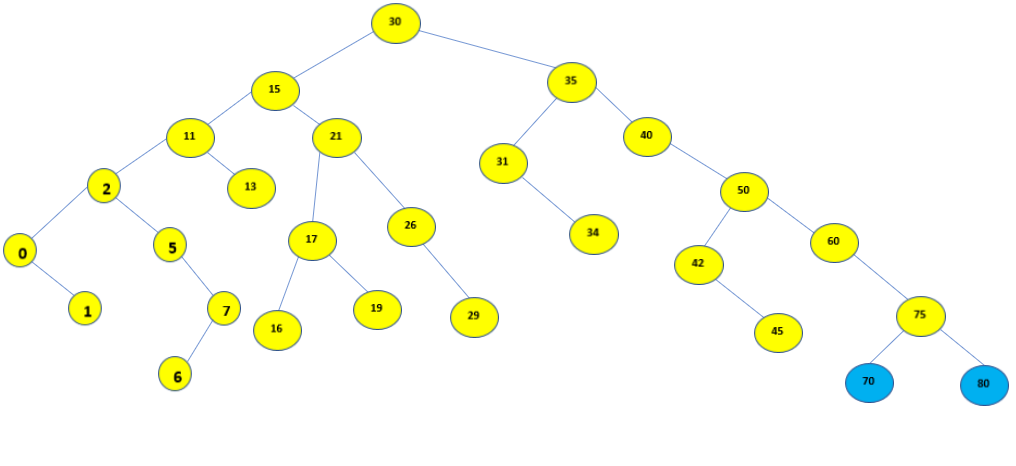


    Preorden:  30, 15, 11, 2, 0, 1, 5, 7, 6, 13, 21, 17, 16, 19, 26, 29, 35, 31, 34, 40, 50, 42, 45, 60, 75, 70, 80.

    Inorden:   0, 1, 2, 5, 6, 7, 11, 13, 15, 16, 17, 19, 21, 26, 29, 30, 31, 34, 35, 40, 42, 45, 50, 60, 70, 75, 80.

    Postorden: 1, 0, 6, 7, 5, 2, 13, 11, 16, 19, 17, 29, 26, 21, 15, 34, 31, 45, 42, 70, 80, 75, 60, 50, 40, 35, 30.



* Pregunta 4

  - Los BST son importante en las ciencias de la computación por las siguientes características:

    1- Son más rápidos a la hora de hacer cualquier búsqueda.

    2- Son recursivos, un árbol binario se compone de otro árbol binario.

    3- Son más rápidos para ordenar datos.


* Pregunta 5

  - https://pythondiario.com/2018/07/arbol-binario-de-busqueda-estructura-de.html


* Pregunta 6

  - Probamos el siguiente código con nuestro árbol de ejemplo del apartado de arriba.
  - Se ha hecho las siguientes modificaciones del código que hemos implementado: 

    . Hemos eliminado la muestra de existencia de nodos de ejemplo.
    
    .Hemos eliminado la muestra del valor más alto y el más bajo.

    .Y por último hemos eliminado la muestra del árbol después de la eliminación de algunos nodos.

  - Se han realizado estas modificaciones ya que son datos que no me interesa mostar y porque lo vamos hacer sobre el árbol de ejemplo del apartado anterior. 

  - Obtenemos todos los elementos del árbol en preorden.

In [ ]:
from __future__ import print_function

# Declaramos la clase "Node"
class Node:

    def __init__(self, label, parent):
        self.label = label
        self.left = None
        self.right = None
        self.parent = parent

        # Métodos para asignar nodos
    def getLabel(self):
        return self.label

    def setLabel(self, label):
        self.label = label

    def getLeft(self):
        return self.left

    def setLeft(self, left):
        self.left = left

    def getRight(self):
        return self.right

    def setRight(self, right):
        self.right = right

    def getParent(self):
        return self.parent

    def setParent(self, parent):
        self.parent = parent


class BinarySearchTree:

    def __init__(self):
        self.root = None

    def insert(self, label):
        # Creamos un nuevo nodo
        new_node = Node(label, None)
        # Si el árbol esta vacio
        if self.empty():
            self.root = new_node
        else:
            # Si el árbol no esta vacio
            curr_node = self.root
            while curr_node is not None:
                parent_node = curr_node
                if new_node.getLabel() < curr_node.getLabel():
                    curr_node = curr_node.getLeft()
                else:
                    curr_node = curr_node.getRight()
            if new_node.getLabel() < parent_node.getLabel():
                parent_node.setLeft(new_node)
            else:
                parent_node.setRight(new_node)
            new_node.setParent(parent_node)      
    
    # Operación de borrado
    def delete(self, label):
        if (not self.empty()):
            node = self.getNode(label)
            if(node is not None):
                if(node.getLeft() is None and node.getRight() is None):
                    self.__reassignNodes(node, None)
                    node = None
                elif(node.getLeft() is None and node.getRight() is not None):
                    self.__reassignNodes(node, node.getRight())
                elif(node.getLeft() is not None and node.getRight() is None):
                    self.__reassignNodes(node, node.getLeft())
                else:
                    tmpNode = self.getMax(node.getLeft())
                    self.delete(tmpNode.getLabel())
                    node.setLabel(tmpNode.getLabel())
    
    def getNode(self, label):
        curr_node = None
        if(not self.empty()):
            curr_node = self.getRoot()
            while curr_node is not None and curr_node.getLabel() is not label:
                if label < curr_node.getLabel():
                    curr_node = curr_node.getLeft()
                else:
                    curr_node = curr_node.getRight()
        return curr_node

    def getMax(self, root = None):
        if(root is not None):
            curr_node = root
        else:
            curr_node = self.getRoot()
        if(not self.empty()):
            while(curr_node.getRight() is not None):
                curr_node = curr_node.getRight()
        return curr_node

    def getMin(self, root = None):
        if(root is not None):
            curr_node = root
        else:
            curr_node = self.getRoot()
        if(not self.empty()):
            curr_node = self.getRoot()
            while(curr_node.getLeft() is not None):
                curr_node = curr_node.getLeft()
        return curr_node

    def empty(self):
        if self.root is None:
            return True
        return False

    def __InOrderTraversal(self, curr_node):
        nodeList = []
        if curr_node is not None:
            nodeList.insert(0, curr_node)
            nodeList = nodeList + self.__InOrderTraversal(curr_node.getLeft())
            nodeList = nodeList + self.__InOrderTraversal(curr_node.getRight())
        return nodeList

    def getRoot(self):
        return self.root

    def __isRightChildren(self, node):
        if(node == node.getParent().getRight()):
            return True
        return False

    def __reassignNodes(self, node, newChildren):
        if(newChildren is not None):
            newChildren.setParent(node.getParent())
        if(node.getParent() is not None):
            if(self.__isRightChildren(node)):
                node.getParent().setRight(newChildren)
            else:
                node.getParent().setLeft(newChildren)

    def traversalTree(self, traversalFunction = None, root = None):
        if(traversalFunction is None):
            return self.__InOrderTraversal(self.root)
        else:
            return traversalFunction(self.root)

    def __str__(self):
        list = self.__InOrderTraversal(self.root)
        str = ""
        for x in list:
            str = str + " " + x.getLabel().__str__()
        return str

def InPreOrder(curr_node):
    nodeList = []
    if curr_node is not None:
        nodeList = nodeList + InPreOrder(curr_node.getLeft())
        nodeList.insert(0, curr_node.getLabel())
        nodeList = nodeList + InPreOrder(curr_node.getRight())
    return nodeList

# Función para probar las clases
def testBinarySearchTree():

    # Instancia del árbol binario de búsqueda
    t = BinarySearchTree()
    #Insertamos los elementos
    t.insert(30)
    t.insert(15)
    t.insert(11)
    t.insert(2)
    t.insert(35)
    t.insert(5)
    t.insert(40)
    t.insert(0)
    t.insert(31)
    t.insert(21)
    t.insert(26)
    t.insert(50)
    t.insert(42)
    t.insert(7)
    t.insert(1)
    t.insert(34)
    t.insert(6)
    t.insert(13)
    t.insert(45)
    t.insert(17)
    t.insert(60)
    t.insert(16)
    t.insert(75)
    t.insert(19)
    t.insert(29)
    t.insert(70)
    t.insert(80)

    print("Preorden: ", t.__str__())

if __name__ == "__main__":
    testBinarySearchTree()

## Práctica 2.6
* 1. ¿Qué es un **camino hamiltoniano**?
* 2. Pon un ejemplo
* 3. Dibújalo
* 4. Resulevelo
* 5. ¿Qué utilidad tiene?
* 6. Muestra los enlaces a un par de vídeos que hablen de ello

### Solución 2.6

* Pregunta 1

  - Para no utilizar la misma definición de los apuntes, lo haré de la forma de la cual he logrado comprender el concepto mejor:

    Lo que pretende un camino hamiltoniano es visitar todos los puntos, nodos o vértices de un grafo sin repetir las aristas.

* Pregunta 2

  - Un ejemplo fácil de comprender sería con un pentágono. 

* Pregunta 3


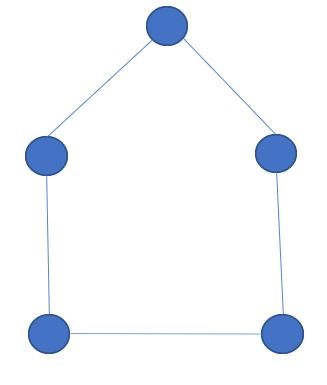



* Pregunta 4


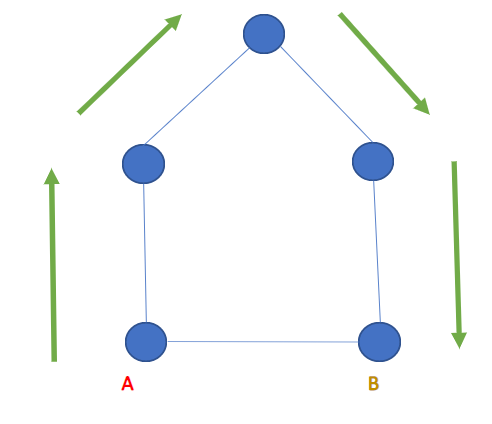

* Pregunta 5

  - La utilidad que consideraría que tiene la aplico por ejemplo a la vida real, si quiero hacer una ruta por 5 ciudades, por ejemplo, Barcelona, Madrid, Galicia, Murcia y Sevilla trataría de realizarla buscando la forma de hacerlo pasando una sola vez por cada una de ellas, es decir, trataría de encontrar un camino hamiltoniano. 

* Pregunta 6

  - Un par de vídeos que lo explican bien serían: 

    . https://www.youtube.com/watch?v=uWqp8rqY4Fs

    . https://www.youtube.com/watch?v=LecNsRcttuw


## Práctica 2.7
* 1. Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)

  - Dibuja el grafo y da tu solución

### Solución 2.7

* Pregunta 1


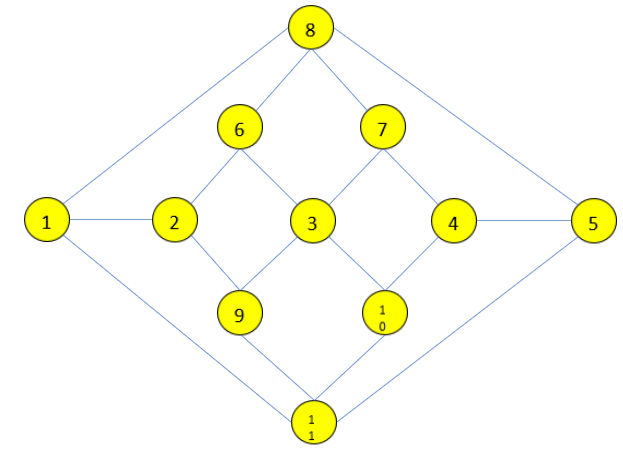



  Solución: El señor del vídeo en el fondo nos está preguntando que si el grafo es hamiltoniano. En nuestro caso no lo es, pues si lo fuera debería tener un ciclo hamiltoniano.
  
  Como el grafo no tiene un ciclo hamiltoniano afirmamos que el grafo tampoco lo es, ya que no hay forma de pasar por todas las ciudades o vértices una sola vez y regresar a la de origen.

## Práctica 2.8
* El problema de **los puentes de Königsberg**
 1. Describe el problema
 2.  Muestra una imagen del grafo resultante
 3.  Quién fue *Euler* y qué hizo para resolver el problema

### Solución 2.8

* Pregunta 1

  - Todo comenzó en Prusia Occidental, exactamente en la ciudad de Königsberg, la cual estaba dividia en cuatro zonas por el río Pregel. 

    Para no perder la comunicación, ésta estaba llena de un sistema de puentes conectores, siete en total: el puente del herrero, el conector, el verde, el del mercado, el de madera, el alto y el de la miel.

    Los habitantes de la ciudad al hacer paseos dominicales trataron de encontrar una forma de caminar por la ciudad, cruzando cada puente una sola vez y regresando al lugar de partida.


* Pregunta 2

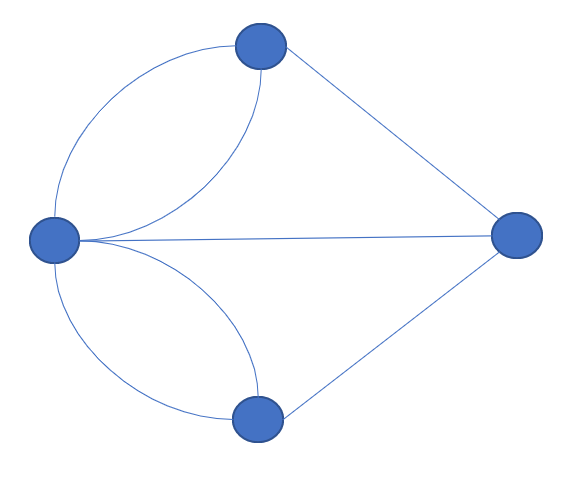

* Pregunta 3

  - Conocido como Leonhard Euler y también llamado Leonardo Euler en español, fue un matemático y físico suizo.

    Se trata del principal matematico del siglo XVIII y uno de los más grandes y prolíficos de todos los tiempos, muy conocido por el número de Euler , el cual aparece en muchas fórmulas de cálculo y física. 

    Vivió en Rusia y también en Berlín la mayor parte de su vida adulta y realizó importantes descubrimientos en áreas tan diversas como el cálculo o la teoría de grafos.

    También introdujo gran parte de la terminología moderna y notación matemática, particularmente para el área del análisis matemático, como, por ejemplo, la noción de función matemática.

* Pregunta 3.1

  - Euler simplificó el mapa del territorio a simplemente unas cuantas líneas y puntos. Eliminó todo lo sobrante:

    Como se puede apreciar en la imagen adjuntada arriba, los distintos territorios en los que los puentes dividieron la ciudad se convirtieron en puntos o vértices y los puentes se conviertieron en líneas, lo que llamamos aristas. También determina que hay un punto de inicio y un punto de salida. 

    Euler consiguió, a partir de este esquema, encontrar la solución de una forma mucho más elegante que la que aplicamos en un principio. Para poder recorrer un sistema de este tipo, los vértices intermedios deben tener un número par de aristas. Es decir, deben tener una vía para entrar y una vía para salir. Sólo los puntos de inicio y salia pueden tener un número impar de aristas, porque, evidentemente, nunca entramos al punto de inicio y nunca salimos del punto de llegada.

    Este tipo de proceder puede aplicarse a multitud de problemas, motivo por el cual la Teoría de Grafos ha llegado a ser en los últimos años una importante herramienta matemática que nos sirve para modelizar matemáticamente numerosas situaciones reales relacionadas con disciplinas tan dispares como la informática, genética ...


## Práctica 2.9
* 1. ¿Qué son los **caminos eulerianos**?
* 2. ¿Qué son los **ciclos eulerianos**?
* 3. Da los enlaces a dos vídeos que hablen de ello
* 4. Dibuja un par de casos

### Solución 2.9

* Pregunta 1

  - Un camino euleriano es un camino que pasa por cada arista una y solo una vez.

* Pregunta 2

  - Un ciclo euleriano es un camino cerrado que recorre cada arista exactamente una vez.

* Pregunta 3

  - https://www.youtube.com/watch?v=57yhBHFCb7w
  - https://www.youtube.com/watch?v=TEzSB1h4bHc

* Pregunta 4

  - Camino euleriano:


  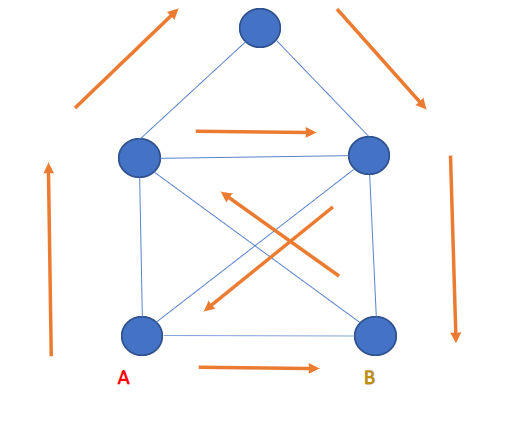


  -  Ciclo euleriano:


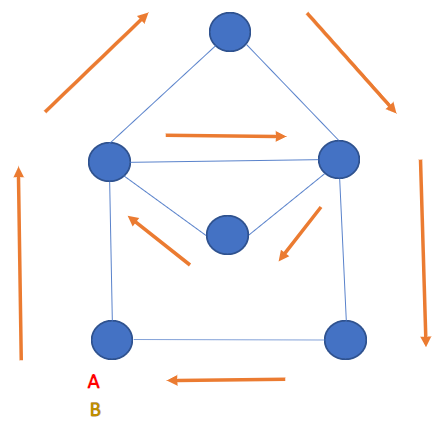






## Práctica 2.10
 Mira estos vídeos:

  [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
  
  [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)

* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo

### Solución 2.10

* Caso 1:

  - El grafo resultante se ha realizado mediante el segundo caso mencionado en el vídeo, el cual dice: "El segundo método para poder dibujar un grafo sin despegar el lápiz es que el punto inicial y el punto final es el mismo". Nuestro grafo empieza por el vértice A y termina en A, pero eso no es todo, sigo dibujando mas aristas dentro de la figura y esto se debe a que la cantidad de vértices de mi figura no supera a 2 vértices con cantidad impares de aristas.

  - He realizado el grafo tanto de manera escrita en pizarra como desarrollada en excel, adjunto imagen de ambos:


  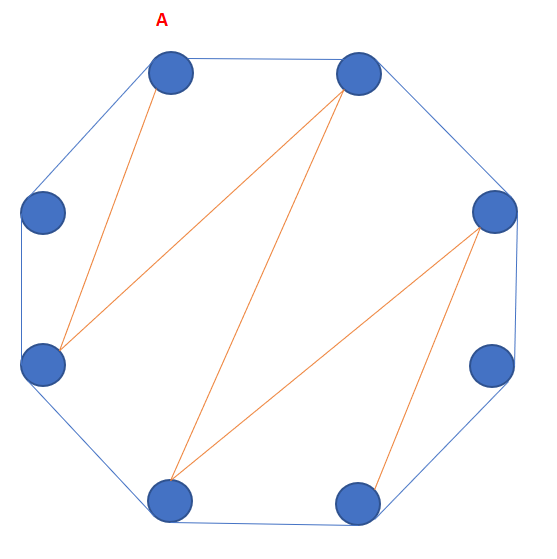

  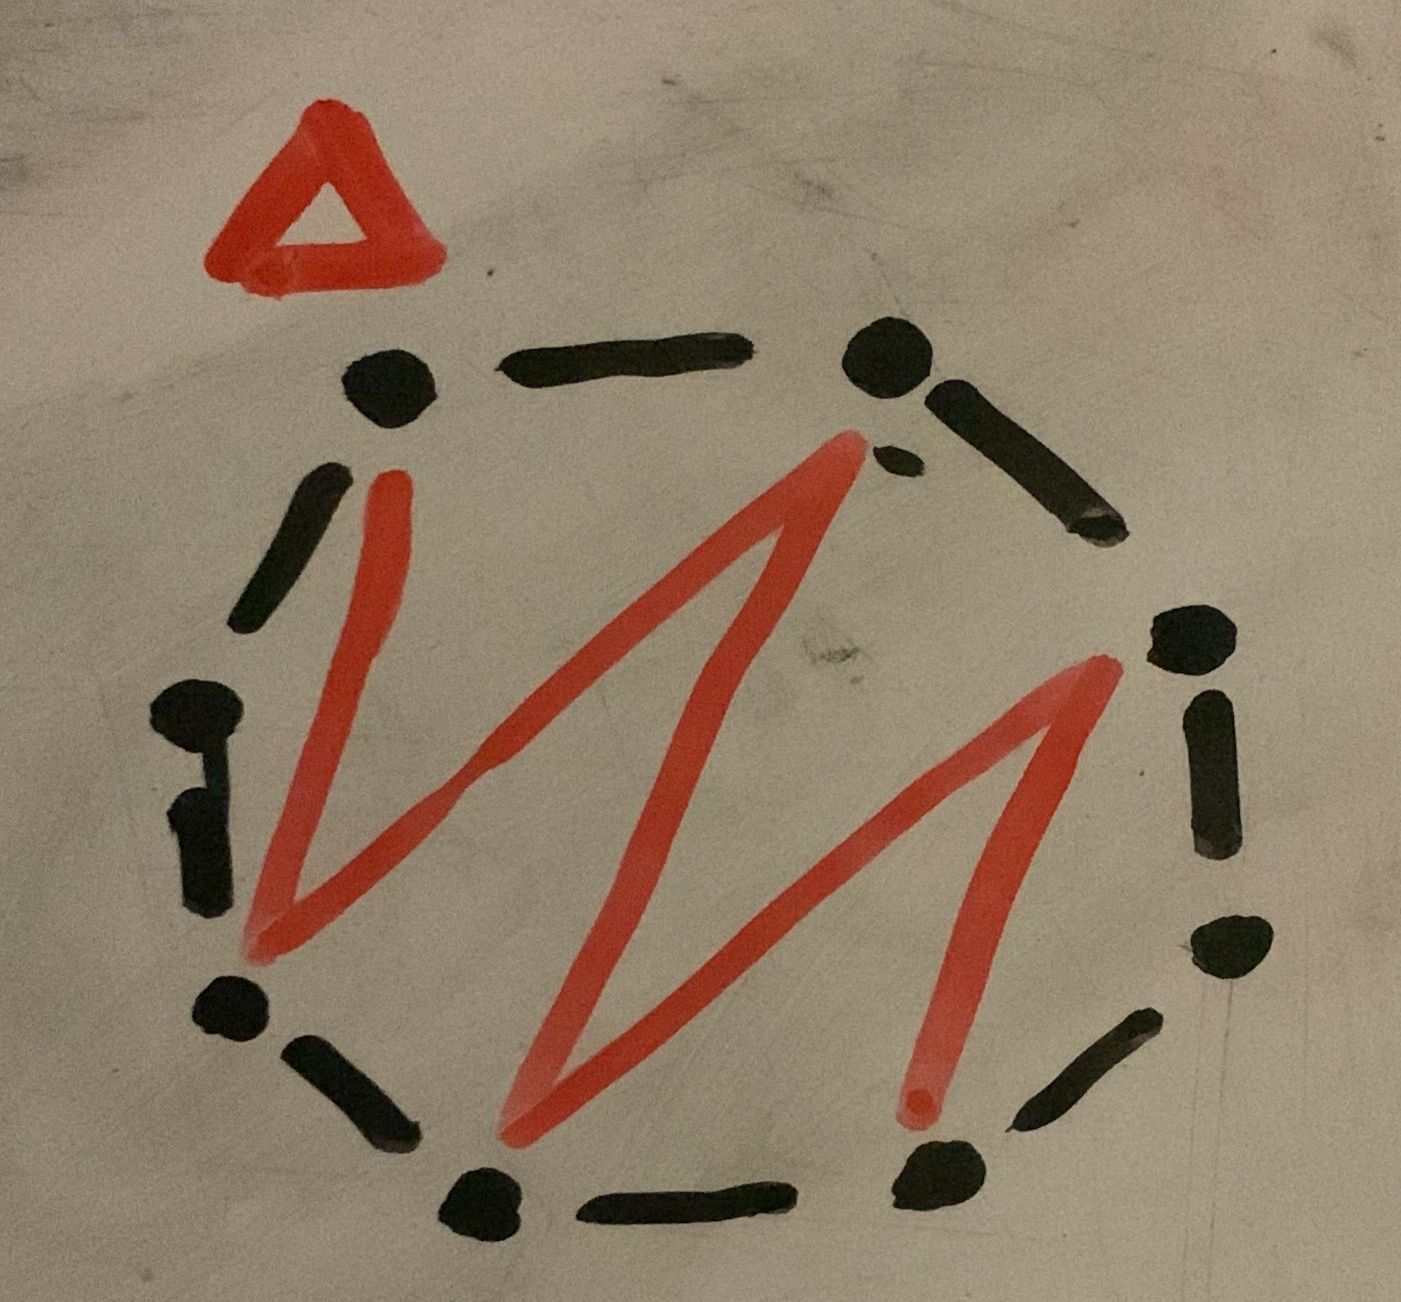

  



* Caso 2: